# cGAN

Learning conditional generative adversarial networks (cGAN).

[Reference Blog](https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/)

[Conditional Generative Adversarial Nets](https://arxiv.org/pdf/1411.1784)

[Deep Generative Image Models using a Laplacian Pyramid of Adversarial Networks](https://arxiv.org/pdf/1506.05751)

[ganhacks](https://github.com/soumith/ganhacks)



In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision
# Data input
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, sampler

# Define the transformation to apply to the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5))
])

# Load the Fashion MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

# Create data loaders
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=128,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=128,
    shuffle=True,
)


In [2]:
# view some of datas
import matplotlib.pyplot as plt

clothing = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(100, 100))
for t, (x, y) in enumerate(train_loader):
    # subplot(figure_row, figure_col, position)
    plt.subplot(10, 10, t + 1)
    plt.imshow(x[0].permute(1, 2, 0), cmap='gray')
    plt.title(clothing[y[0].item()])
    plt.axis('off')

    if t + 1 >= 100:
        break

plt.show()

In [3]:
# set up environment
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
print('Using device:', device)
print('Using datatype:', dtype)

Using device: cuda
Using datatype: <class 'torch.cuda.FloatTensor'>


## GAN

First, review the GAN.

In [8]:
import GAN_D as GAN_D
import GAN_G as GAN_G

noise_Dim = 128

D = GAN_D.Discriminator().type(dtype)
G = GAN_G.Generator(noise_Dim).type(dtype)

optimizer_D = torch.optim.Adam(D.parameters(), lr=1e-4)
optimizer_G = torch.optim.Adam(G.parameters(), lr=1e-4)

Using device: cuda
Using datatype: <class 'torch.cuda.FloatTensor'>


Epoch 0, Iteration 0, loss_D = 1.4969, loss_G = 1.4098


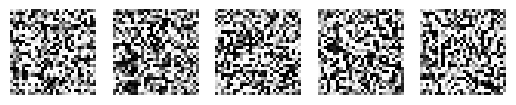

Epoch 0, Iteration 100, loss_D = 0.2516, loss_G = 3.4022


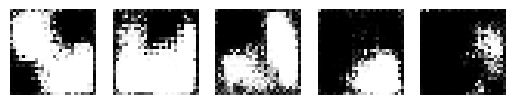

Epoch 0, Iteration 200, loss_D = 0.1576, loss_G = 5.3952


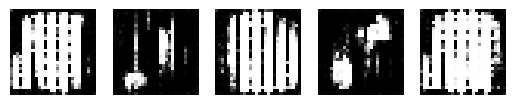

Epoch 0, Iteration 300, loss_D = 0.1544, loss_G = 4.5849


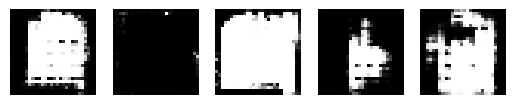

Epoch 0, Iteration 400, loss_D = 0.2063, loss_G = 3.3574


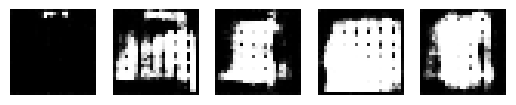

Epoch 1, Iteration 0, loss_D = 0.1541, loss_G = 4.0006


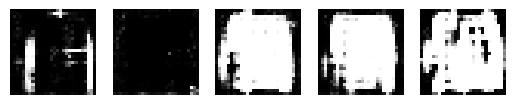

Epoch 1, Iteration 100, loss_D = 0.6474, loss_G = 5.3998


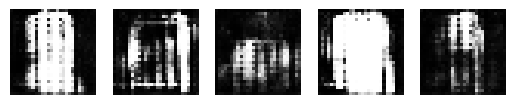

Epoch 1, Iteration 200, loss_D = 0.2785, loss_G = 3.6325


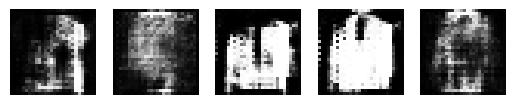

Epoch 1, Iteration 300, loss_D = 0.2800, loss_G = 3.0167


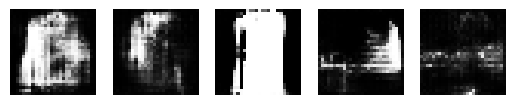

Epoch 1, Iteration 400, loss_D = 0.4279, loss_G = 4.2884


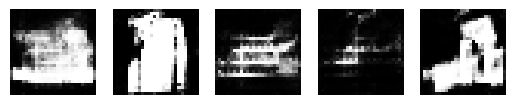

Epoch 2, Iteration 0, loss_D = 0.4914, loss_G = 3.1170


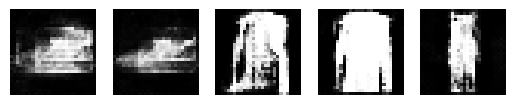

Epoch 2, Iteration 100, loss_D = 0.4036, loss_G = 2.2864


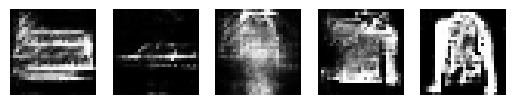

Epoch 2, Iteration 200, loss_D = 0.6883, loss_G = 2.6490


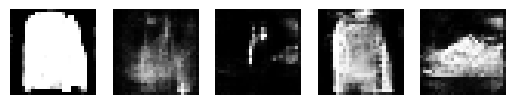

Epoch 2, Iteration 300, loss_D = 0.4253, loss_G = 2.8005


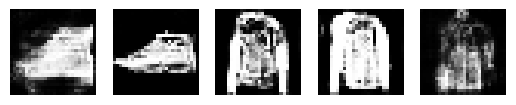

Epoch 2, Iteration 400, loss_D = 0.4805, loss_G = 2.2217


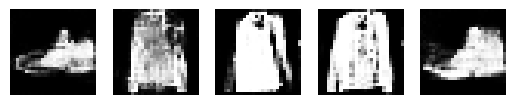

Epoch 3, Iteration 0, loss_D = 0.6437, loss_G = 2.3036


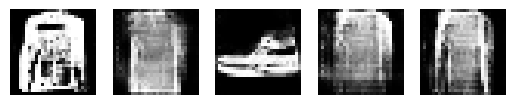

Epoch 3, Iteration 100, loss_D = 0.4732, loss_G = 2.4924


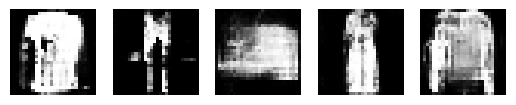

Epoch 3, Iteration 200, loss_D = 0.6468, loss_G = 1.4712


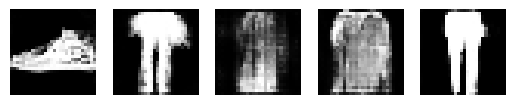

Epoch 3, Iteration 300, loss_D = 0.6789, loss_G = 2.1313


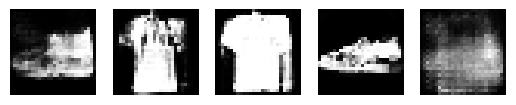

Epoch 3, Iteration 400, loss_D = 0.5270, loss_G = 2.2831


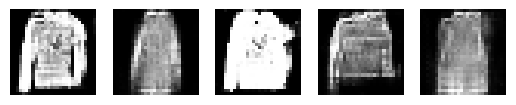

Epoch 4, Iteration 0, loss_D = 0.5942, loss_G = 2.2332


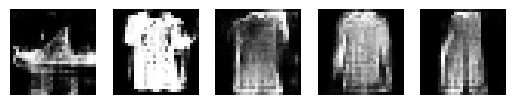

Epoch 4, Iteration 100, loss_D = 0.5582, loss_G = 1.6685


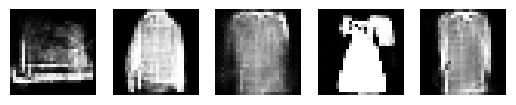

Epoch 4, Iteration 200, loss_D = 0.7463, loss_G = 1.8893


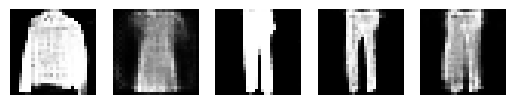

Epoch 4, Iteration 300, loss_D = 0.5838, loss_G = 2.1489


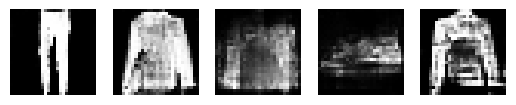

Epoch 4, Iteration 400, loss_D = 0.7408, loss_G = 2.3968


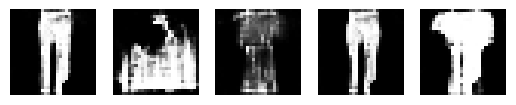

Epoch 5, Iteration 0, loss_D = 0.6029, loss_G = 2.3284


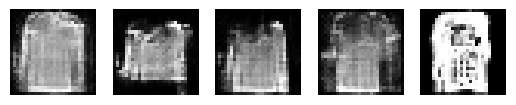

Epoch 5, Iteration 100, loss_D = 0.7424, loss_G = 2.0727


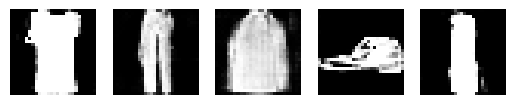

Epoch 5, Iteration 200, loss_D = 0.6642, loss_G = 2.0763


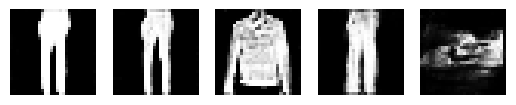

Epoch 5, Iteration 300, loss_D = 0.8153, loss_G = 1.6253


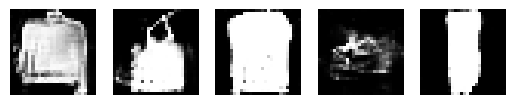

Epoch 5, Iteration 400, loss_D = 0.7048, loss_G = 1.9711


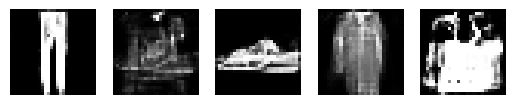

Epoch 6, Iteration 0, loss_D = 0.6464, loss_G = 2.0982


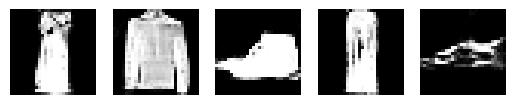

Epoch 6, Iteration 100, loss_D = 0.6527, loss_G = 1.7327


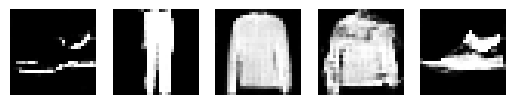

Epoch 6, Iteration 200, loss_D = 0.5005, loss_G = 1.5409


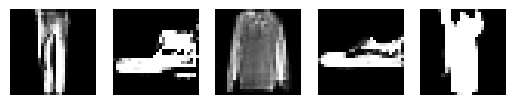

Epoch 6, Iteration 300, loss_D = 0.7788, loss_G = 1.6742


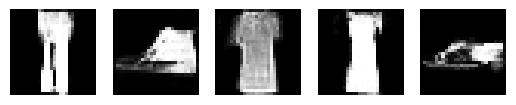

Epoch 6, Iteration 400, loss_D = 0.6394, loss_G = 2.0619


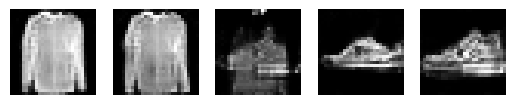

Epoch 7, Iteration 0, loss_D = 0.6682, loss_G = 1.9129


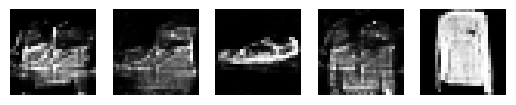

Epoch 7, Iteration 100, loss_D = 0.6823, loss_G = 1.9951


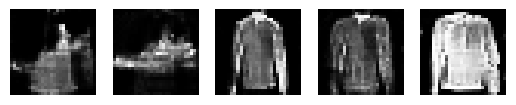

Epoch 7, Iteration 200, loss_D = 0.6880, loss_G = 2.0474


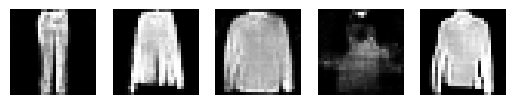

Epoch 7, Iteration 300, loss_D = 0.8464, loss_G = 1.9543


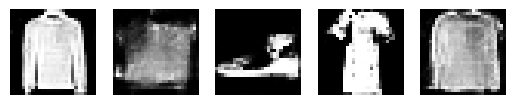

Epoch 7, Iteration 400, loss_D = 0.8088, loss_G = 2.1949


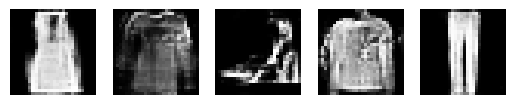

Epoch 8, Iteration 0, loss_D = 0.7238, loss_G = 1.6908


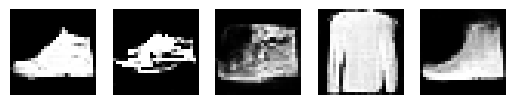

Epoch 8, Iteration 100, loss_D = 0.7402, loss_G = 1.3700


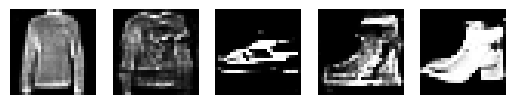

Epoch 8, Iteration 200, loss_D = 0.5872, loss_G = 1.7515


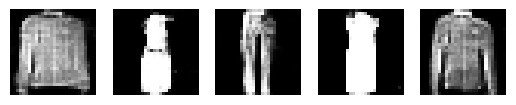

Epoch 8, Iteration 300, loss_D = 0.8734, loss_G = 2.0184


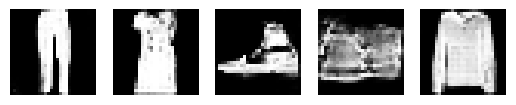

Epoch 8, Iteration 400, loss_D = 0.8878, loss_G = 1.9879


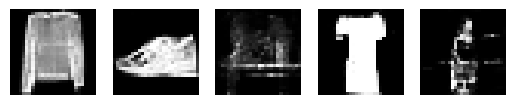

Epoch 9, Iteration 0, loss_D = 0.7412, loss_G = 1.9467


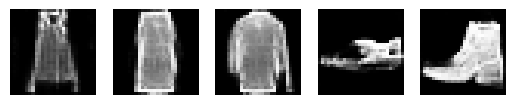

Epoch 9, Iteration 100, loss_D = 0.7277, loss_G = 1.7244


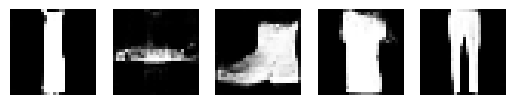

Epoch 9, Iteration 200, loss_D = 0.8569, loss_G = 2.1372


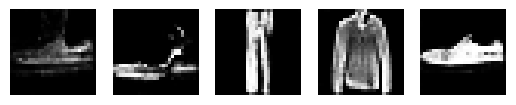

Epoch 9, Iteration 300, loss_D = 0.6233, loss_G = 2.3454


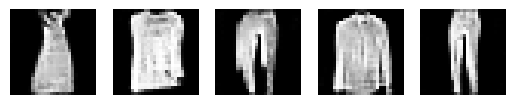

Epoch 9, Iteration 400, loss_D = 0.9915, loss_G = 1.2933


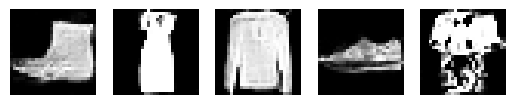

In [9]:
# train the GAN

for epoch in range(10):
    for t, (x, _) in enumerate(train_loader):
        batch_size = x.shape[0]
        for i in range(1):
            real = x.type(dtype)
            fake = G(torch.randn(batch_size, noise_Dim).type(dtype))
            scores_real = D(real)
            scores_fake = D(fake)

            # Train the discriminator
            optimizer_D.zero_grad()
            loss_D = D.loss_ce(scores_real, scores_fake)
            loss_D.backward()
            optimizer_D.step()

        # Train the generator
        for i in range(2):
            fake = G(torch.randn(batch_size, noise_Dim).type(dtype))
            scores_fake = D(fake)
            
            optimizer_G.zero_grad()
            loss_G = G.loss_ce(scores_fake)
            loss_G.backward()
            optimizer_G.step()

        if t % 100 == 0:
            print('Epoch %d, Iteration %d, loss_D = %.4f, loss_G = %.4f' % (epoch, t, loss_D.item(), loss_G.item()))
            for i in range(5):
                plt.subplot(1, 5, i + 1)
                plt.imshow(fake[i].cpu().detach().permute(1, 2, 0), cmap='gray')
                plt.axis('off')
            plt.show()

In [10]:
# show results
imgs = G(torch.randn(100, noise_Dim).type(dtype)).detach().cpu()
plt.figure(figsize=(100, 100))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(imgs[i].permute(1, 2, 0), cmap='gray')
    plt.axis('off')
plt.show()

## cGAN

The main idea is to embed the label into the input so that the generator can generate the image according to the label while the discriminator can distinguish the image according to the label.

The architecture of cGAN is similar to GAN, but the input of the generator and the discriminator is the concatenation of the label and the noise.

Epoch 0, Iteration 0, loss_D = 1.4014, loss_G = 1.3116


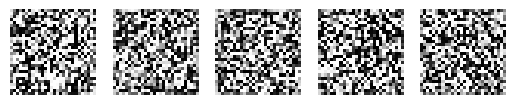

Epoch 0, Iteration 100, loss_D = 0.1802, loss_G = 3.9292


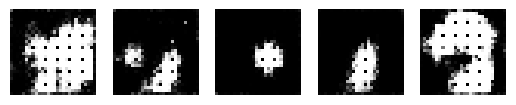

Epoch 0, Iteration 200, loss_D = 0.1904, loss_G = 3.7241


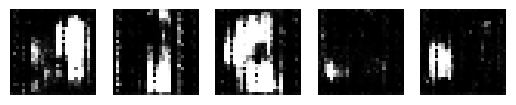

Epoch 0, Iteration 300, loss_D = 0.3226, loss_G = 3.7177


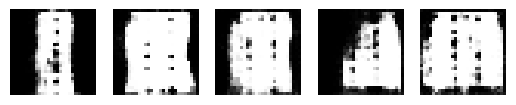

Epoch 0, Iteration 400, loss_D = 0.8953, loss_G = 3.2560


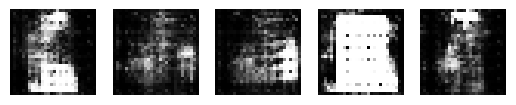

Epoch 1, Iteration 0, loss_D = 0.4584, loss_G = 3.7625


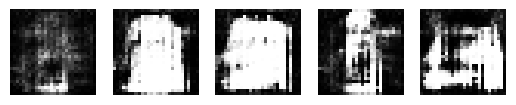

Epoch 1, Iteration 100, loss_D = 0.4686, loss_G = 3.6334


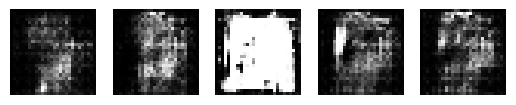

Epoch 1, Iteration 200, loss_D = 0.3315, loss_G = 3.0069


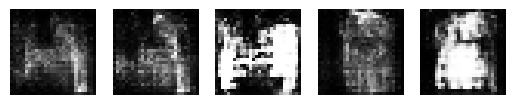

Epoch 1, Iteration 300, loss_D = 0.3855, loss_G = 2.3147


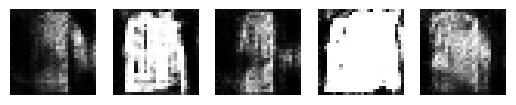

Epoch 1, Iteration 400, loss_D = 0.3613, loss_G = 2.3015


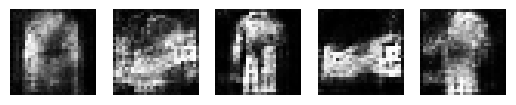

Epoch 2, Iteration 0, loss_D = 0.4715, loss_G = 2.6909


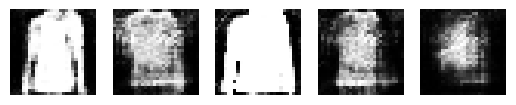

Epoch 2, Iteration 100, loss_D = 0.3540, loss_G = 2.7156


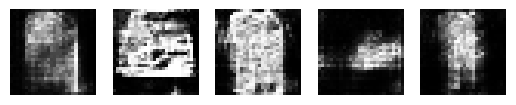

Epoch 2, Iteration 200, loss_D = 0.4014, loss_G = 2.9922


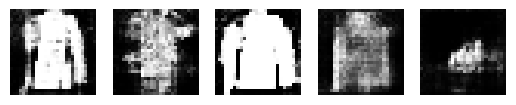

Epoch 2, Iteration 300, loss_D = 0.5197, loss_G = 2.9133


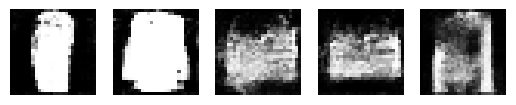

Epoch 2, Iteration 400, loss_D = 0.4479, loss_G = 3.4518


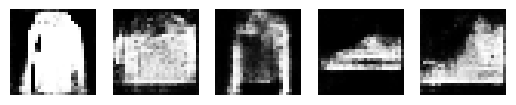

Epoch 3, Iteration 0, loss_D = 0.6685, loss_G = 2.8065


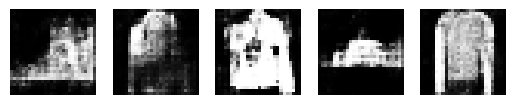

Epoch 3, Iteration 100, loss_D = 0.9092, loss_G = 1.9597


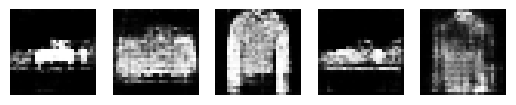

Epoch 3, Iteration 200, loss_D = 0.4615, loss_G = 2.7338


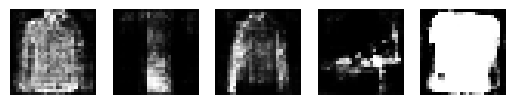

Epoch 3, Iteration 300, loss_D = 0.8085, loss_G = 2.8819


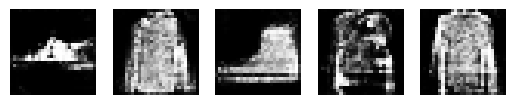

Epoch 3, Iteration 400, loss_D = 0.7636, loss_G = 1.8520


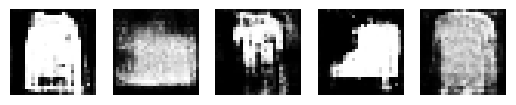

Epoch 4, Iteration 0, loss_D = 0.4855, loss_G = 2.4450


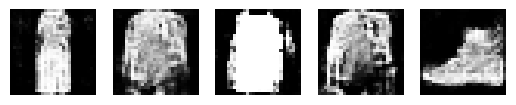

Epoch 4, Iteration 100, loss_D = 0.3992, loss_G = 2.1064


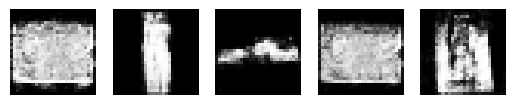

Epoch 4, Iteration 200, loss_D = 0.6312, loss_G = 2.3981


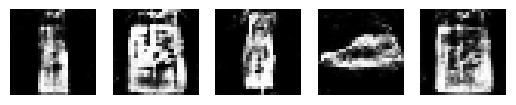

Epoch 4, Iteration 300, loss_D = 0.6153, loss_G = 1.3448


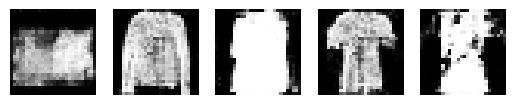

Epoch 4, Iteration 400, loss_D = 0.6168, loss_G = 1.8959


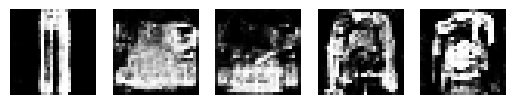

Epoch 5, Iteration 0, loss_D = 0.5506, loss_G = 2.4333


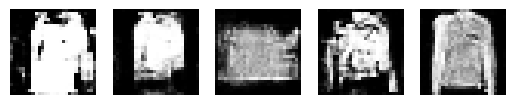

Epoch 5, Iteration 100, loss_D = 0.7115, loss_G = 1.9052


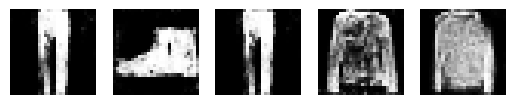

Epoch 5, Iteration 200, loss_D = 0.6398, loss_G = 2.4089


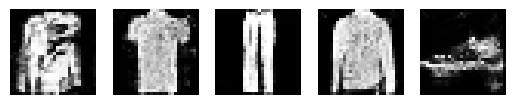

Epoch 5, Iteration 300, loss_D = 0.6551, loss_G = 1.7065


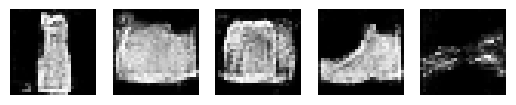

Epoch 5, Iteration 400, loss_D = 0.6341, loss_G = 1.3262


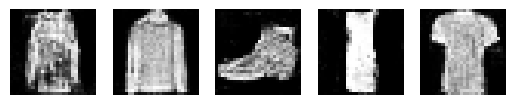

Epoch 6, Iteration 0, loss_D = 0.5872, loss_G = 2.1113


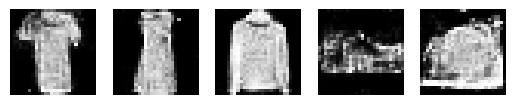

Epoch 6, Iteration 100, loss_D = 0.6294, loss_G = 1.8128


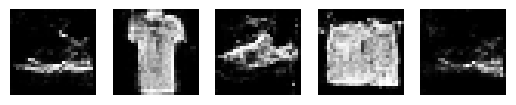

Epoch 6, Iteration 200, loss_D = 0.8954, loss_G = 1.8708


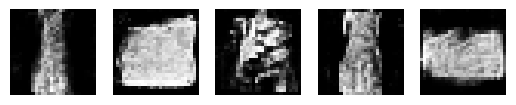

Epoch 6, Iteration 300, loss_D = 0.6905, loss_G = 2.6602


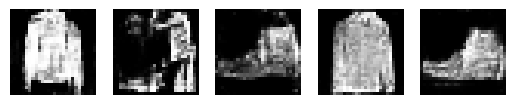

Epoch 6, Iteration 400, loss_D = 0.6934, loss_G = 1.8595


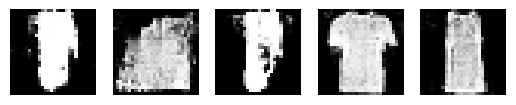

Epoch 7, Iteration 0, loss_D = 0.8569, loss_G = 1.8231


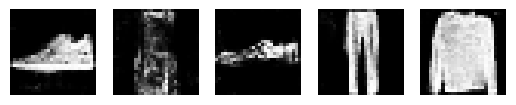

Epoch 7, Iteration 100, loss_D = 0.8869, loss_G = 1.2224


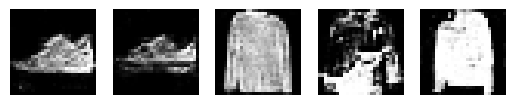

Epoch 7, Iteration 200, loss_D = 0.9245, loss_G = 1.3807


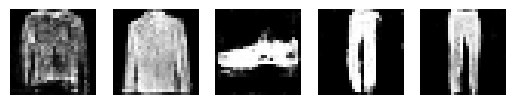

Epoch 7, Iteration 300, loss_D = 0.6864, loss_G = 2.1369


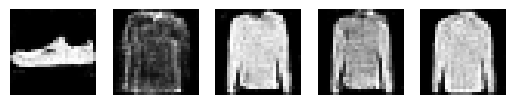

Epoch 7, Iteration 400, loss_D = 0.7492, loss_G = 2.0055


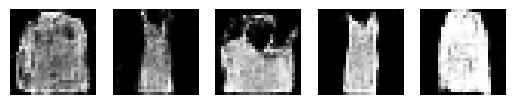

Epoch 8, Iteration 0, loss_D = 0.6429, loss_G = 1.9606


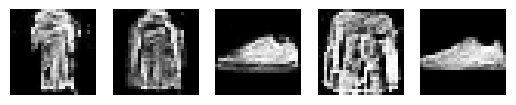

Epoch 8, Iteration 100, loss_D = 0.5189, loss_G = 1.5807


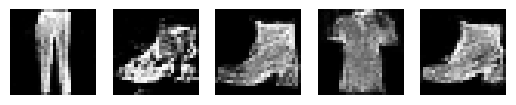

Epoch 8, Iteration 200, loss_D = 0.5071, loss_G = 1.9036


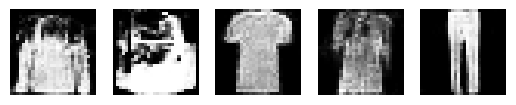

Epoch 8, Iteration 300, loss_D = 1.0358, loss_G = 1.4236


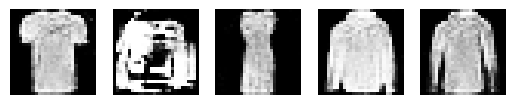

Epoch 8, Iteration 400, loss_D = 0.5153, loss_G = 2.0487


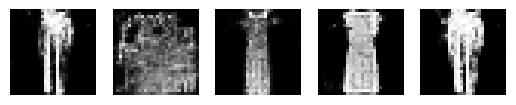

Epoch 9, Iteration 0, loss_D = 0.7465, loss_G = 1.3541


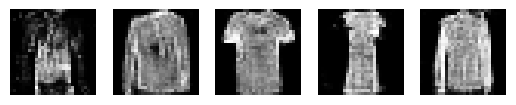

Epoch 9, Iteration 100, loss_D = 0.7274, loss_G = 2.1869


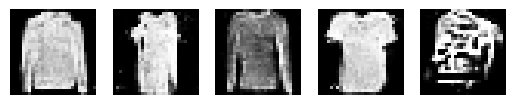

Epoch 9, Iteration 200, loss_D = 0.7230, loss_G = 2.2839


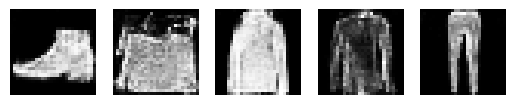

Epoch 9, Iteration 300, loss_D = 0.7514, loss_G = 2.2452


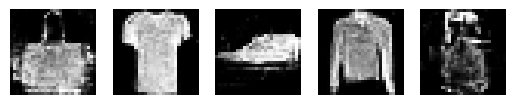

Epoch 9, Iteration 400, loss_D = 0.7181, loss_G = 1.8097


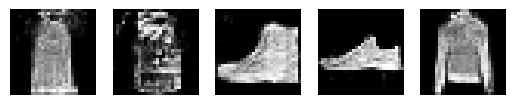

In [18]:
# set up the model
import cGAN_D
import cGAN_G
import torch.nn.functional as F

noise_Dim = 128

D = cGAN_D.Discriminator().type(dtype)
G = cGAN_G.Generator(noise_Dim).type(dtype)

optimizer_D = torch.optim.Adam(D.parameters(), lr=1e-4)
optimizer_G = torch.optim.Adam(G.parameters(), lr=1e-4)

# train the cGAN
for epoch in range(10):
    for t, (x, y) in enumerate(train_loader):
        batch_size = x.shape[0]
        x = x.type(dtype)
        y = F.one_hot(y, 10).type(dtype)
        for i in range(1):
            real = x
            fake = G(torch.randn(batch_size, noise_Dim).type(dtype), y)
            scores_real = D(real, y)
            scores_fake = D(fake, y)

            # Train the discriminator
            optimizer_D.zero_grad()
            loss_D = D.loss_ce(scores_real, scores_fake)
            loss_D.backward()
            optimizer_D.step()

        # Train the generator
        for i in range(2):
            fake = G(torch.randn(batch_size, noise_Dim).type(dtype), y)
            scores_fake = D(fake, y)
            
            optimizer_G.zero_grad()
            loss_G = G.loss_ce(scores_fake)
            loss_G.backward()
            optimizer_G.step()

        if t % 100 == 0:
            print('Epoch %d, Iteration %d, loss_D = %.4f, loss_G = %.4f' % (epoch, t, loss_D.item(), loss_G.item()))
            for i in range(5):
                plt.subplot(1, 5, i + 1)
                plt.imshow(fake[i].cpu().detach().permute(1, 2, 0), cmap='gray')
                plt.axis('off')
            plt.show()

In [20]:
# show results
imgs = G(torch.randn(100, noise_Dim).type(dtype), F.one_hot(torch.arange(100) % 10, 10).type(dtype)).detach().cpu()
plt.figure(figsize=(100, 100))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(imgs[i].permute(1, 2, 0), cmap='gray')
    plt.axis('off')
plt.show()

The results shows that use addition to do embedding (like transformer) works better than concatening, maybe because it cut down the model, which makes it easier to converge.